# Fertilizer Recommendation System

## Business Understanding

### Problem Statement:

Farmers often struggle with nutrient management, particularly in selecting the right type and amount of fertilizer for their crops. Fertilizer mismanagement can lead to several issues:

- Nutrient Imbalance: Excessive or insufficient fertilizer application can create nutrient imbalances in the soil, potentially harming crop health and reducing yields.

- Soil Degradation: Overuse or misuse of fertilizers can result in soil degradation over time, reducing its fertility and increasing the risk of environmental pollution.

- Economic Loss: Fertilizers are a significant expense for farmers, and incorrect usage may lead to wasted resources and financial strain.

Without data-driven insights, farmers may find it challenging to choose the optimal fertilizer mix based on the specific requirements of each crop.

##### Objective:

The main goal of this project is to develop an intelligent Fertilizer Recommendation System that provides precise fertilizer recommendations based on soil conditions and crop requirements. By leveraging machine learning, the system will help farmers:

- 1.Identify the exact nutrient needs (N, P, K levels) of their soil.
- 2.Determine the most effective fertilizer composition for each crop.
- 3.Optimize fertilizer usage to improve crop health, increase yields, and promote sustainable practices.

##### Solutions and Benefits:

This recommendation system will offer solutions in the following areas:

- Fertilizer Recommendation: The system will analyze soil data (e.g., nitrogen, phosphorus, potassium levels) and provide specific fertilizer recommendations tailored to each crop. By identifying nutrient deficiencies or excesses, the system ensures balanced fertilization for better crop growth and soil health.

- Cost Optimization: By recommending the right fertilizer amount and type, farmers can reduce costs associated with over-application, thereby saving money while achieving the desired crop yields.

- Sustainable Farming: With precise fertilizer recommendations, the system promotes sustainable agriculture by reducing nutrient runoff, preventing soil degradation, and lowering the environmental impact of fertilizer use.

- Personalized Recommendations: The system will take into account each farm's unique soil profile and climate conditions, providing farmers with customized fertilizer recommendations to meet specific crop needs.



## Data Understanding

### Dataset Overview:

Rows: 2200
Columns: 8
- N (Nitrogen): Soil nitrogen content (integer).
- P (Phosphorus): Soil phosphorus content (integer).
- K (Potassium): Soil potassium content (integer).
- Temperature: Temperature in degrees Celsius (float).
- Humidity: Humidity percentage (float).
- pH: Soil pH level (float).
- Rainfall: Rainfall in mm (float).
- Label: Crop name or type (string/object).

In [25]:
#Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

In [26]:
#loading the dataset
fert_data=pd.read_csv('crop_recommendation.csv')
fert_data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [27]:
#Summary of the dataset
fert_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [28]:
#Checking for missing values
fert_data.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [29]:
fert_data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [30]:
Numeric_crop = fert_data.select_dtypes(include=['float', 'int64'])
corr= Numeric_crop.corr()
corr

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


<Axes: >

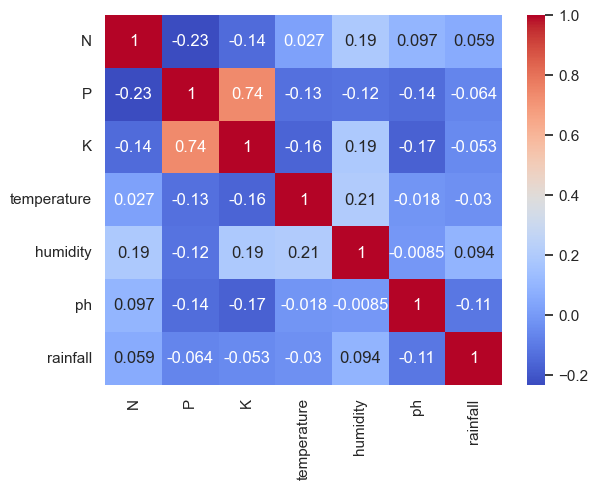

In [31]:
sns.heatmap(corr,annot=True,cbar=True,cmap='coolwarm')

- Observations:

###### *P and K*:
There is a strong positive correlation (0.74) between Phosphorus and Potassium, suggesting that as levels of one increase, so do levels of the other. This could indicate that these nutrients are often found together or are similarly influenced by soil and environmental conditions.

###### *K and temperature*: 
There is a moderate negative correlation (-0.16) between Potassium and temperature, suggesting that as temperature increases, Potassium levels might slightly decrease.

###### *Humidity and rainfall*: 
There’s a low positive correlation (0.1) between humidity and rainfall, indicating a weak association between these two variables.

###### *pH and other factors*:
pH shows very low correlations with most variables, indicating it is largely independent within this dataset.

Most other variable pairs show very weak correlations (values close to 0), suggesting little to no linear association between them.

## Exploratory Data Analysis
### Univariate Analysis


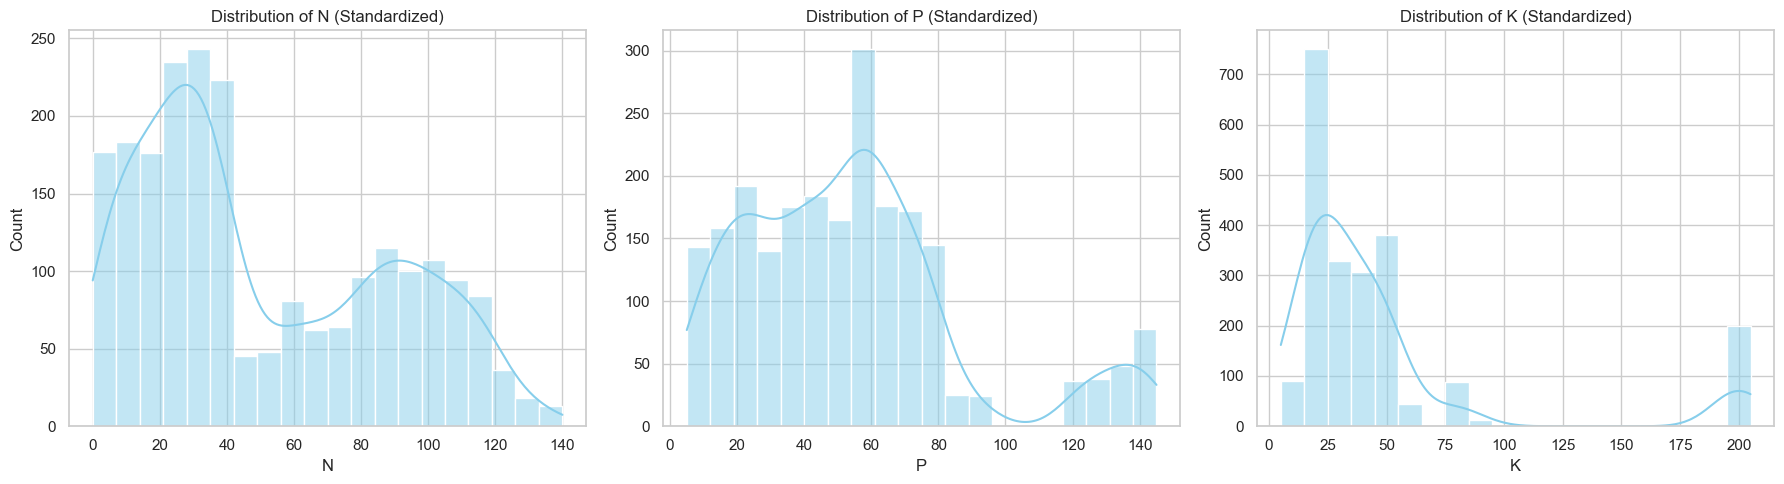

C:\Users\stacy\AppData\Local\Temp\ipykernel_8396\3406952498.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='label', data=fert_data, palette='viridis', order=fert_data['label'].value_counts().index)


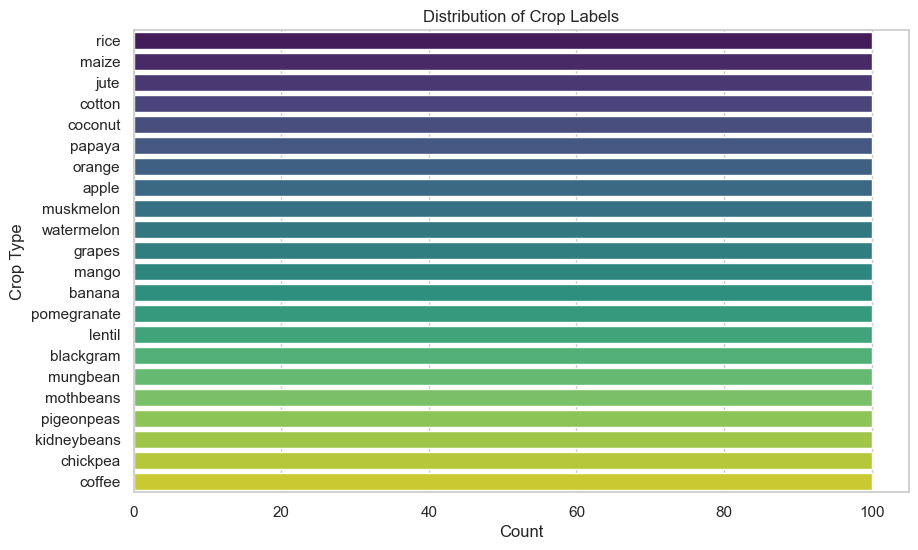

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

#Set plot style for better visuals
sns.set(style="whitegrid")

#1. Distribution of Nutrient Levels (N, P, K)
plt.figure(figsize=(18, 5))
for i, col in enumerate(['N', 'P', 'K']):
    plt.subplot(1, 3, i + 1)
    sns.histplot(fert_data[col], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribution of {col} (Standardized)')
plt.tight_layout()
plt.show()

# Crop Label Distribution
plt.figure(figsize=(10, 6))
sns.countplot(y='label', data=fert_data, palette='viridis', order=fert_data['label'].value_counts().index)
plt.title('Distribution of Crop Labels')
plt.xlabel('Count')
plt.ylabel('Crop Type')
plt.show()

C:\Users\stacy\AppData\Local\Temp\ipykernel_8396\1063741299.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=fert_data, x='label', y=nutrient, palette='viridis')
C:\Users\stacy\AppData\Local\Temp\ipykernel_8396\1063741299.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=fert_data, x='label', y=nutrient, palette='viridis')
C:\Users\stacy\AppData\Local\Temp\ipykernel_8396\1063741299.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=fert_data, x='label', y=nutrient, palette='viridis')


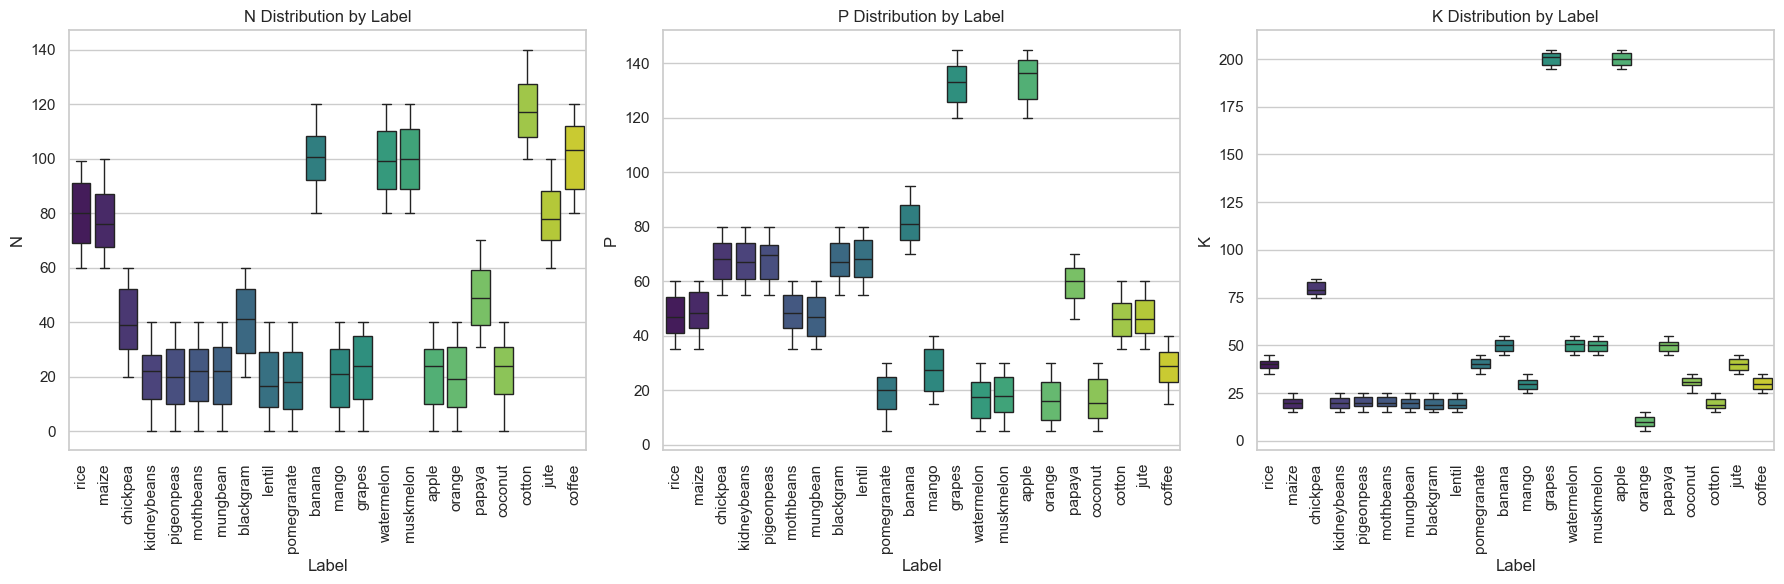

In [34]:
# Set up the figure size
plt.figure(figsize=(18, 6))

# Create box plots for each nutrient
nutrients = ['N', 'P', 'K']
for i, nutrient in enumerate(nutrients, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=fert_data, x='label', y=nutrient, palette='viridis')
    plt.title(f'{nutrient} Distribution by Label')
    plt.xlabel('Label')
    plt.ylabel(nutrient)
    plt.xticks(rotation=90) 

plt.tight_layout()
plt.show()


- Nitrogen (N) Distribution by Label

###### *High-Nitrogen Crops*:

Cotton, coffee, Juite,muskmelon, watermelon,banana, maize and Rice  have high Nitrogen levels, with medians close to or above 80. These crops may require a substantial amount of Nitrogen for optimal growth.   


###### *Moderate-Nitrogen Crops*:

Chickpeas, blackgram, and papaya display moderate Nitrogen levels, with medians around 30-70. These crops have a balanced Nitrogen requirement, neither too high nor too low.
                                                                               
###### *Lower-Nitrogen Crops*:

Rice, chickpea, and lentil have lower Nitrogen levels, with medians around 30–60, indicating they thrive with less Nitrogen input.
   
Crops with a wider range in their Nitrogen levels, with variability across different samples, could reflect different requirements based on specific growth conditions.

- Phosphorus (P) Distribution by Crop
###### *High-Phosphorus Crops*:

Grapes and apple stand out with high Phosphorus levels, with medians around 120-140, showing a substantial requirement for this nutrient, rather could be due to environmental or varietal factors.Plays out as outliers.

###### *Moderate-Phosphorus Crops*:
Ricw, Maize, chickpea, kidneybeans, pigeonbeans, mothbean, blackgram, lentil, banana papaya, cotton, and juite have moderate Phosphorus levels, with medians around 40-90, indicating a balanced Phosphorus need.

###### *Lower-Phosphorus Crops*:
Pomegranate, mango, muskmelon, watermelon, orange, coconut and coffee have lower Phosphorus levels, with medians closer to (20–30) suggesting minimal Phosphorus suffices for their growth.


-  Potassium (K) Distribution by Crop

###### *Ouliers*
There are outliers observed in crops like Grapes and Apple, which have particularly high medians, exceeding 200.

##### *High Pottasium Levels*
Chickpeas exhibit high potassium levels, with a range between 75 and 100, indicating a substantial potassium supply.

###### *Moderate Potassium Levels*:
Rice, pomegranate, banana, Mango, watermelon, muskmelon, papaya,cococnut,jute and coffee show  moderate Potassium levels generally between 25 and 60, suggesting these crops thrive with a balanced potassium supply.
    
###### *Lower Potassium Levels*:
Maize, kidneybeans, pigeonbeans, mothbeans, mungbeans,pigeonpea, mothbeans, and blackgram, lentil, orange and cotton  display lower potassium levels, around 10 to 25, meaning they require only minimal potassium input.                                                                             
###### *Consistent Patterns*:
The Potassium levels show relatively low variability across each crop suggesting consistent Potassium need for most crops in this dataset.

## Bivariate Analysis

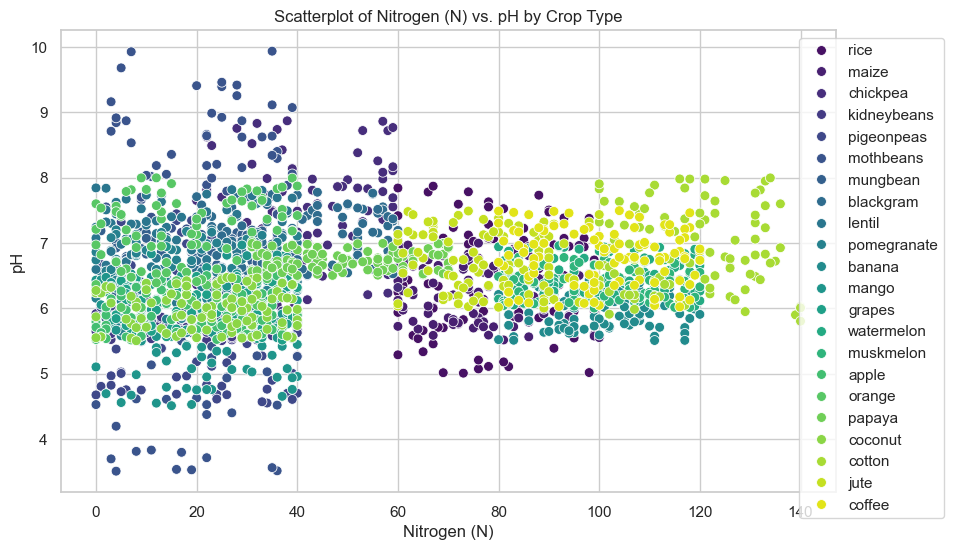

In [ ]:
# Scatterplot between Nitrogen (N) and pH with crop label as hue
plt.figure(figsize=(10, 6))
sns.scatterplot(data=fert_data, x='N', y='ph', hue='label', palette="viridis", s=50)
plt.title("Scatterplot of Nitrogen (N) vs. pH by Crop Type")
plt.xlabel("Nitrogen (N)")
plt.ylabel("pH")
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()


#### Nitrogen (N) vs. pH by Crop Type:

The scatterplot shows how nitrogen levels vary with pH across different crops.

- Insight:

1. Certain crops appear to thrive in specific pH ranges with varying nitrogen needs. For example, some crops are more concentrated in either lower or higher pH ranges, indicating an ideal pH condition for each crop type.

2. Crops with moderate to high nitrogen needs are generally spread across a wider range of pH values, suggesting that nitrogen requirements might be less sensitive to pH variations than for other nutrients.

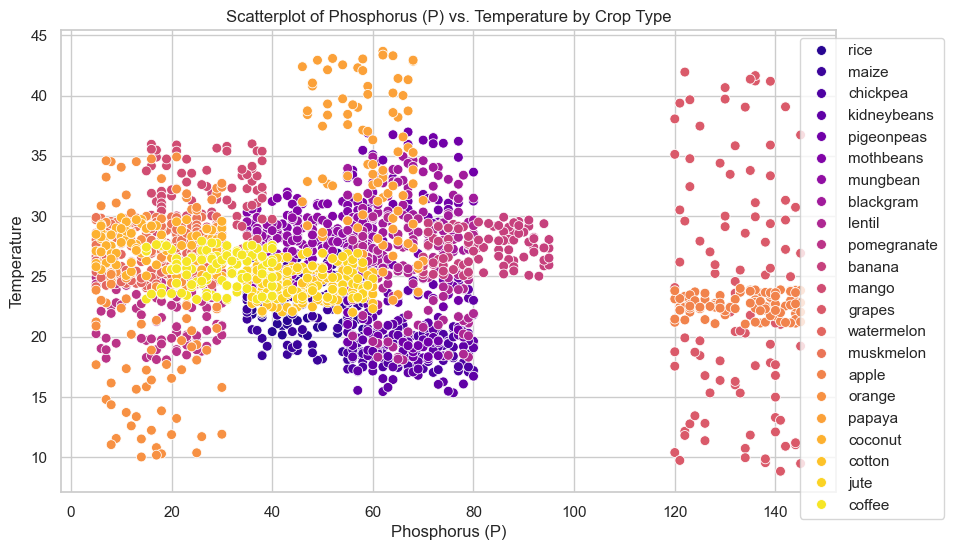

In [ ]:
# Scatterplot between Phosphorus (P) and temperature with crop label as hue
plt.figure(figsize=(10, 6))
sns.scatterplot(data=fert_data, x='P', y='temperature', hue='label', palette="plasma", s=50)
plt.title("Scatterplot of Phosphorus (P) vs. Temperature by Crop Type")
plt.xlabel("Phosphorus (P)")
plt.ylabel("Temperature")
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()

#### Phosphorus (P) vs. Temperature by Crop Type:

The relationship between phosphorus levels and temperature varies across crop types, showing distinct clusters for certain crops.

- Insight:

1. Crops that need higher phosphorus levels seem to be better suited to moderate to higher temperatures. 
2. Conversely, crops that require lower phosphorus levels are more common at lower temperatures, suggesting an inverse relationship between phosphorus requirements and lower temperature ranges.

This indicates that phosphorus levels may need to be adjusted based on seasonal temperatures to optimize crop health.

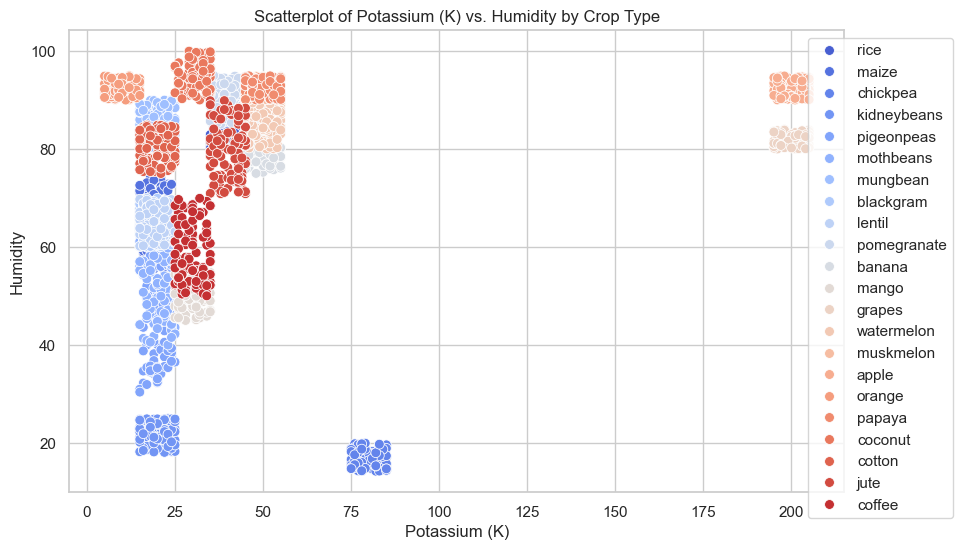

In [ ]:
# Scatterplot between Potassium (K) and humidity with crop label as hue
plt.figure(figsize=(10, 6))
sns.scatterplot(data=fert_data, x='K', y='humidity', hue='label', palette="coolwarm", s=50)
plt.title("Scatterplot of Potassium (K) vs. Humidity by Crop Type")
plt.xlabel("Potassium (K)")
plt.ylabel("Humidity")
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()

#### Potassium (K) vs. Humidity by Crop Type:

This plot reveals the relationship between potassium levels and humidity across crops.

- Insight:

1. Potassium requirements across crops appear to be quite stable, with relatively low variability across different crops. This suggests that potassium may be a generally stable requirement for most crops, with little adjustment needed based on humidity.
2. However, some specific crops may show a slight tendency toward higher potassium needs at increased humidity levels, which could indicate a need for tailored potassium adjustments under certain climatic conditions.


## Modelling

In [ ]:
#Defining the feature columns from the target variable
X = fert_data[['temperature', 'humidity', 'ph', 'rainfall', 'label']]
y = fert_data[['N', 'P', 'K']]


In [ ]:
#Preprocessing the data before modelling
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['temperature', 'humidity', 'ph', 'rainfall']), #Standardizes the numerical columns
        ('cat', OneHotEncoder(), ['label']) #Encoding the categorical column 'label'
    ]
)

In [ ]:
#Defining a RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:
#Creating a pipeline that first preprocess then applies the regressor
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', rf_regressor)
])


In [ ]:
#Splitting into train-test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#fitting the model
model.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['temperature', 'humidity',
                                                   'ph', 'rainfall']),
                                                 ('cat', OneHotEncoder(),
                                                  ['label'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [ ]:
#making predictions
y_pred = model.predict(X_test)
y_pred

array([[102.41,  14.75,  50.97],
       [ 95.92,  15.2 ,  48.74],
       [ 55.15,  58.96,  50.73],
       ...,
       [113.51,  46.37,  19.69],
       [119.79,  48.42,  18.77],
       [ 16.01,  68.99,  19.42]])

In [ ]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred, multioutput='raw_values')
rmse = np.sqrt(mean_squared_error(y_test, y_pred, multioutput='raw_values'))

print("Mean Absolute Error for N, P, K:", mae)
print("Root Mean Squared Error for N, P, K:", rmse)


Mean Absolute Error for N, P, K: [10.58390909  7.07897727  2.77236364]
Root Mean Squared Error for N, P, K: [12.60033241  8.33229174  3.30355167]


In [ ]:
# Display sample predictions
sample_predictions = pd.DataFrame(y_pred, columns=['Predicted N', 'Predicted P', 'Predicted K'])
sample_results = pd.concat([X_test.reset_index(drop=True), y_test.reset_index(drop=True), sample_predictions], axis=1)

print("Sample Results:")
print(sample_results.head())

Sample Results:
   temperature   humidity        ph    rainfall       label    N    P    K  \
0    29.494014  94.729813  6.185053   26.308209   muskmelon  101   17   47   
1    26.179346  86.522581  6.259336   49.430510  watermelon   98    8   51   
2    43.360515  93.351916  6.941497  114.778071      papaya   59   62   49   
3    34.280461  90.555616  6.825371   98.540477      papaya   44   60   55   
4    22.914300  90.704756  5.603413  118.604465       apple   30  137  200   

   Predicted N  Predicted P  Predicted K  
0       102.41        14.75        50.97  
1        95.92        15.20        48.74  
2        55.15        58.96        50.73  
3        46.32        56.79        49.94  
4        20.43       134.18       199.84  


In [ ]:
sample_results.head()

,temperature,humidity,ph,rainfall,label,N,P,K,Predicted N,Predicted P,Predicted K
0,29.494014,94.729813,6.185053,26.308209,muskmelon,101,17,47,102.41,14.75,50.97
1,26.179346,86.522581,6.259336,49.430510,watermelon,98,8,51,95.92,15.20,48.74
2,43.360515,93.351916,6.941497,114.778071,papaya,59,62,49,55.15,58.96,50.73
3,34.280461,90.555616,6.825371,98.540477,papaya,44,60,55,46.32,56.79,49.94
4,22.914300,90.704756,5.603413,118.604465,apple,30,137,200,20.43,134.18,199.84
